# Building A CNN Image Classifier
#### Joshua Greenert
#### DSC550-T301 Data Mining
#### 11/4/2022

In [41]:
# Load the MNIST data set.
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

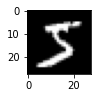

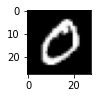

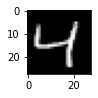

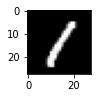

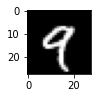

In [42]:
# Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). 
# Compare these to the first five training labels.
from matplotlib import pyplot as plt

# Loop through the images and create a plot from the data.
for i in range(5):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [43]:
# Compare the images with the first 5 training labels
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [44]:
import numpy as np
import keras
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

# Set constants for the rows and columns for images.
img_rows, img_cols=28, 28
 
# Reshape the data.
if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    inpx = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    inpx = (img_rows, img_cols, 1)
    
# Convert the data to floats.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Set the data to categorical.
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Set up the layers of the model.
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

# Compile the model
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Fit the model and run for 20 epochs.
model.fit(x_train, y_train, epochs=20, batch_size=500)

Epoch 1/20
120/120 [==============================] - 40s 326ms/step - loss: 2.5325 - accuracy: 0.0904
Epoch 2/20
120/120 [==============================] - 39s 323ms/step - loss: 2.5111 - accuracy: 0.0904
Epoch 3/20
120/120 [==============================] - 39s 325ms/step - loss: 2.4900 - accuracy: 0.0904
Epoch 4/20
120/120 [==============================] - 40s 332ms/step - loss: 2.4694 - accuracy: 0.0904
Epoch 5/20
120/120 [==============================] - 40s 331ms/step - loss: 2.4490 - accuracy: 0.0904
Epoch 6/20
120/120 [==============================] - 39s 325ms/step - loss: 2.4301 - accuracy: 0.0904
Epoch 7/20
120/120 [==============================] - 39s 329ms/step - loss: 2.4110 - accuracy: 0.0904
Epoch 8/20
120/120 [==============================] - 39s 323ms/step - loss: 2.3923 - accuracy: 0.0904
Epoch 9/20
120/120 [==============================] - 39s 322ms/step - loss: 2.3742 - accuracy: 0.0904
Epoch 10/20
120/120 [==============================] - 39s 323ms/step - l

In [45]:
# Report the test accuracy of your model.
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 2.1974422931671143
accuracy= 0.44359999895095825


In [49]:
# Display a confusion matrix on the test set classifications.
from sklearn.metrics import confusion_matrix

# Use the test data for the predictions.
prediction_y = model.predict(x_test)

# Use np.argmax to ensure that the axis labels are correct.
prediction_y = np.argmax(prediction_y, axis = 1)
y_test = np.argmax(y_test, axis = 1)

# Create the confusion matrix
cm = confusion_matrix(y_test, prediction_y)
cm

313/313 [==============================] - 3s 8ms/step


array([[ 885,    0,   40,    7,    0,   35,    0,    1,   12,    0],
       [   0, 1052,   52,   10,    0,   21,    0,    0,    0,    0],
       [  33,   24,  792,  129,    0,   25,    0,   14,   15,    0],
       [ 153,   89,  115,  563,    0,   29,    0,   30,   31,    0],
       [  16,   59,  629,    1,   21,  188,    0,   67,    1,    0],
       [ 155,  106,  106,  105,    4,  253,    0,   23,  140,    0],
       [  86,   61,  783,    5,    2,   20,    0,    0,    1,    0],
       [  10,  152,   89,    6,    0,  164,    0,  607,    0,    0],
       [ 138,   76,  296,   39,    0,   34,    0,  128,  263,    0],
       [  53,   99,  344,    7,    1,  193,    0,  304,    8,    0]],
      dtype=int64)

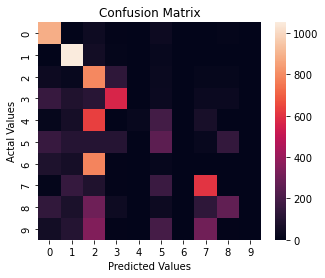

In [55]:
# Build a dataframe from the confusion matrix and display the data in a plot.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# build the dataframe.
cm_df = pd.DataFrame(cm)

# Plotting the confusion matrix using the sns heatmap.
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=False)

plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Conclusion

Using the dataset and tools from keras shows undoubtedly how neural networks can find answers through considerable efforts, or in the case of the mnist dataset, epochs.  Initially, the test was ran with 5 epochs to determine the accuracy of predicting the appropriate value for the images.  While this did have results that expressed a realistic accuracy, we can narrow the gap for a statistically significant value by providing a higher number of epochs for the neural network to attempt.  After attempting 20 epochs, we see that the accuracy produces a higher value closer to 50%.  Using the confusion matrix, we can see the values that were predicted and the actual values through a plotted heat map that isolates their respective significance.  While this may not appear valuable at the moment, further increases on the amount of epochs would show a considerably different graph overall.